In [2]:
###########################
# 라이브러리 사용
import tensorflow as tf
import numpy as np
 
###########################
# 샘플 이미지셋 불러오기

# _ 는 변수, 여기서는 사용하지 않을거라는 암묵적 표시로 쓰임

(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)
 
(cifar_x, cifar_y), _ = tf.keras.datasets.cifar10.load_data()
print(cifar_x.shape, cifar_y.shape)

(60000, 28, 28) (60000,)
(50000, 32, 32, 3) (50000, 1)


[5 0 4 1 9 2 1 3 1 4]


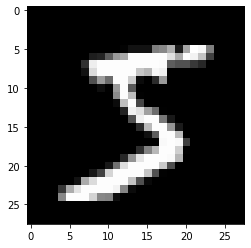

In [3]:
###########################
# 이미지 출력하기
import matplotlib.pyplot as plt
 
print(mnist_y[0:10])
plt.imshow(mnist_x[0], cmap='gray')

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


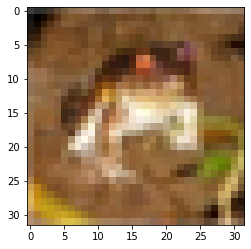

In [4]:
print(cifar_y[0:10])
plt.imshow(cifar_x[0])

In [5]:
# 차원 확인
d1 = np.array([1, 2, 3, 4, 5])
print(d1.shape)
 
d2 = np.array([d1, d1, d1, d1])
print(d2.shape)
 
d3 = np.array([d2, d2, d2])
print(d3.shape)
 
d4 = np.array([d3, d3])
print(d4.shape)

(5,)
(4, 5)
(3, 4, 5)
(2, 3, 4, 5)


In [6]:
x1 = np.array([1, 2, 3, 4, 5])
print(x1.shape)
print(mnist_y[0:5])
print(mnist_y[0:5].shape, "\n")
 
x2 = np.array([[1, 2, 3, 4, 5]])
print(x2.shape, "\n")
 
x3 = np.array([[1], [2], [3], [4], [5]])
print(x3.shape)
print(cifar_y[0:5])
print(cifar_y[0:5].shape)

(5,)
[5 0 4 1 9]
(5,) 

(1, 5) 

(5, 1)
[[6]
 [9]
 [9]
 [4]
 [1]]
(5, 1)


In [7]:
print(mnist_y.shape)
print(cifar_y.shape)

(60000,)
(50000, 1)


In [8]:
print(mnist_x.shape, mnist_y.shape)

(60000, 28, 28) (60000,)


# reshape 사용

In [14]:
import pandas as pd

mnist_x = mnist_x.reshape(60000, 784) # 2차원 배열로 reshape
mnist_y = pd.get_dummies(mnist_y) #원핫인코딩
print(mnist_x.shape, mnist_y.shape)

(60000, 784) (60000, 10)


In [11]:
X = tf.keras.layers.Input(shape=[784])
H = tf.keras.layers.Dense(84)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X,Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [30]:
model.fit(mnist_x, mnist_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0495 - accuracy: 0.9842
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0460 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0439 - accuracy: 0.9859
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0422 - accuracy: 0.9867
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0392 - accuracy: 0.9874
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0370 - accuracy: 0.9880
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0351 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0339 - accuracy: 0.9892
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0327 - accuracy: 0.9890
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.032

In [19]:
pred = model.predict(mnist_x[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
mnist_y[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1


# flatten 사용

In [21]:
(mnist_x, mnist_y), _ = tf.keras.datasets.mnist.load_data()
print(mnist_x.shape, mnist_y.shape)

(60000, 28, 28) (60000,)


In [22]:
mnist_y = pd.get_dummies(mnist_y)

In [25]:
X = tf.keras.layers.Input(shape=[28,28])
H = tf.keras.layers.Flatten()(X)
H = tf.keras.layers.Dense(84)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)

model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')

In [32]:
model.fit(mnist_x, mnist_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0242 - accuracy: 0.9916
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0230 - accuracy: 0.9925
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0237 - accuracy: 0.9924
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0236 - accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0215 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0221 - accuracy: 0.9926
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0228 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0211 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.021

In [28]:
pred = model.predict(mnist_x[0:5])
pd.DataFrame(pred).round(2)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
mnist_y[0:5]

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
